# Introducción 

La base de datos que se utilizará en este reto es la de Telecom X, que contiene información sobre clientes, suscripciones y servicios de telecomunicaciones. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones y tendencias en el comportamiento de los clientes, así como para detectar posibles problemas o áreas de mejora en los servicios ofrecidos. 

Para ello, se utilizarán técnicas de limpieza y transformación de datos, así como herramientas de visualización y análisis estadístico. El análisis se centrará en aspectos como la distribución de los clientes por tipo de suscripción, el uso de servicios, la satisfacción del cliente y la retención de clientes.

El propósito general de este reto es encontrar patrones de personas que han abandono la empresa y que han permanecido en la empresa, para así poder identificar las características de los clientes que abandonan la empresa y las que permanecen.

# Importar librerias necesarias, diccionario de variables e importación de los datos

Con el fin de analizar los datos, es necesario utilizar las siguientes librerías de Python:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- requests
- json

In [572]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

## Leer los datos 
Los datos se encuentran en un archivo JSON, por lo que se utilizará la librería requests para obtener los datos y la librería json para convertirlos en un DataFrame de Pandas.

In [573]:
datos = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
resultado = json.loads(datos.text)
df = pd.DataFrame(resultado)

In [574]:
customer_df = pd.json_normalize(df['customer'])
phone_df    = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df  = pd.json_normalize(df['account'])

# Ahora concatenamos todo con las columnas originales que ya estaban planas
df = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [575]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Limpieza y tratamiento de datos
Una vez que se han leído los datos, es necesario realizar una limpieza y tratamiento de los mismos. La conversión de tipos de datos, el manejo de valores nulos y la creación de nuevas variables si es necesario, de igual forma se traducirán las variables al español para facilitar su comprensión.

### Analisis exploratorio de datos 
En esta sección de la limpieza y tratamiento de datos, se realizará un análisis exploratorio de los datos para los tipos de datos y asegurarnos que no haya valores nulos, de igual forma nos interesa conocer como estan registrados los datos, para poder realizar las traducciones.

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [577]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [578]:
df['Contract'].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [579]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

In [580]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

In [581]:
col_yes_no = ['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'InternetService', 'OnlineBackup','OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV',
              'StreamingMovies', 'PaperlessBilling']
df[col_yes_no].value_counts()

Churn  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  InternetService  OnlineBackup         OnlineSecurity       DeviceProtection     TechSupport          StreamingTV          StreamingMovies      PaperlessBilling
No     0              No       No          Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  No                  348
                      Yes      Yes         Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  No                  273
                      No       No          Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Yes                 139
                      Yes      Yes         Yes     

In [582]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

### Tratamiento de datos nulos y traducciones
En esta sección se realizará el tratamiento de los datos nulos y las traducciones de las variables al español. Se utilizará la librería Pandas para realizar el tratamiento de los datos nulos y las traducciones de las variables al español.

Los datos nulos serán eliminados, debido a que no se cuenta con información adicional para imputar los valores nulos, de igual forma los espacios en también serán eliminados, ya que no se cuenta con información adicional para imputar los valores nulos.

In [583]:
df['Charges.Total'].value_counts()
df['Charges.Total'] = df['Charges.Total'].replace(['', ' '], pd.NA)
df = df.dropna(subset=['Charges.Total']).copy()
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df.dropna(subset=['Charges.Total'])
df['Charges.Total'].isna().sum()

np.int64(0)

In [584]:
df['Churn'].value_counts()
df['Churn'] = df['Churn'].replace('', pd.NA).replace(' ', pd.NA)
df = df.dropna(subset=['Churn'])
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [585]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [586]:
col_yes_no = ['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'InternetService', 'OnlineBackup','OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV',
              'StreamingMovies', 'PaperlessBilling']
for col in df[col_yes_no]:
    df[col] = df[col].replace('Yes','Si')



df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['gender'] = df['gender'].replace("Female", "Mujer").replace("Male", "Hombre")
df['InternetService'] = df['InternetService'].replace('Fiber optic','Fibra Óptica')
df['Contract'] = df['Contract'].replace('Month-to-month', 'Mes a mes').replace('Two year', 'Dos años').replace('One year','Un año')
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'Cheque electrónico').replace('Mailed check', 'Cheque por enviado por correo').replace('Bank transfer (automatic)','Transferencia bancaria (automática)').replace('Credit card (automatic)', 'Tarjeta de crédito (automática)')
df['SeniorCitizen'] = df['SeniorCitizen'].replace("1", "Si").replace("0","No")


### Transformación a tipo de dato apropiado
En esta sección se realizará la transformación de los datos a los tipos de datos apropiados, para poder realizar el análisis exploratorio de los datos. Se utilizará la librería Pandas para realizar la transformación de los datos a los tipos de datos apropiados.

In [587]:
columnas_str = ['SeniorCitizen']
columnas_float = ['Charges.Total']
df[columnas_str] = df[columnas_str].astype(str)
df[columnas_float] = df[columnas_float].astype(float)

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Cuentas diarias y dataframes de abandono y permanencia
Por último se creará una columna que contenga el cobro diario de cada cliente para poder analizar un análisis sobre si este puede tener un impacto en la decisión de abandonar la empresa o no, para crear esta columna se dividirá el total de cobro mensual entre 30, para obtener el cobro diario.

De igual forma se crearán dos dataframes, uno que contenga los datos de los clientes que han abandonado la empresa y otro que contenga los datos de los clientes que han permanecido en la empresa, para poder realizar un análisis comparativo entre ambos grupos.

In [589]:
df['Cuentas_diarias'] = (df['Charges.Monthly']/30).round(2)

In [590]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Cuentas_diarias']

In [591]:
col_order = ['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Cuentas_diarias',
 'Charges.Monthly',
 'Charges.Total']


df = df[col_order]

In [592]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cuentas_diarias,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Mujer,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Un año,Si,Cheque por enviado por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Hombre,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mes a mes,No,Cheque por enviado por correo,2.00,59.90,542.40
2,0004-TLHLJ,Si,Hombre,No,No,No,4,Si,No,Fibra Óptica,...,Si,No,No,No,Mes a mes,Si,Cheque electrónico,2.46,73.90,280.85
3,0011-IGKFF,Si,Hombre,Si,Si,No,13,Si,No,Fibra Óptica,...,Si,No,Si,Si,Mes a mes,Si,Cheque electrónico,3.27,98.00,1237.85
4,0013-EXCHZ,Si,Mujer,Si,Si,No,3,Si,No,Fibra Óptica,...,No,Si,Si,No,Mes a mes,Si,Cheque por enviado por correo,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Mujer,No,No,No,13,Si,No,DSL,...,No,Si,No,No,Un año,No,Cheque por enviado por correo,1.84,55.15,742.90
7263,9992-RRAMN,Si,Hombre,No,Si,No,22,Si,Si,Fibra Óptica,...,No,No,No,Si,Mes a mes,Si,Cheque electrónico,2.84,85.10,1873.70
7264,9992-UJOEL,No,Hombre,No,No,No,2,Si,No,DSL,...,No,No,No,No,Mes a mes,Si,Cheque por enviado por correo,1.68,50.30,92.75
7265,9993-LHIEB,No,Hombre,No,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Dos años,No,Cheque por enviado por correo,2.26,67.85,4627.65


In [593]:
# Dejo la empresa 
df_churn_yes = df[df['Churn'] == 'Si']

#Se quedo en la empresa 
df_churn_no = df[df['Churn'] == 'No']

In [594]:
df.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,2.159891,64.798208,2283.300441
std,24.545260,1.002955,30.085974,2266.771362
min,1.000000,0.610000,18.250000,18.800000
25%,9.000000,1.187500,35.587500,401.450000
50%,29.000000,2.340000,70.350000,1397.475000
75%,55.000000,2.992500,89.862500,3794.737500
max,72.000000,3.960000,118.750000,8684.800000


# Analisis de datos

## Distribución de empleados que no abandonaron la empresa y los que si lo hicieron

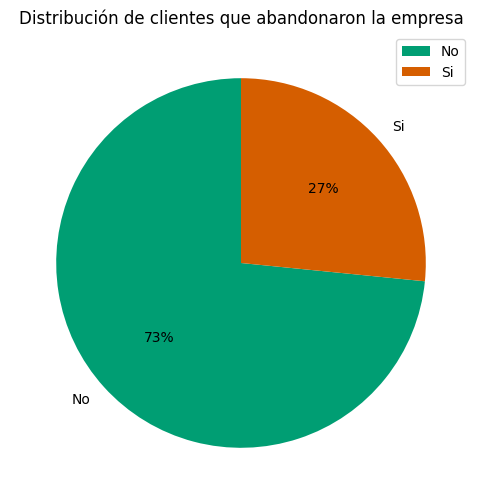

In [595]:
colors_pie = {'Si': '#D55E00',
              'No': '#009E73'}
fig, ax = plt.subplots(figsize=(16, 6))
counts = df['Churn'].value_counts()
colors = [colors_pie[label] for label in counts.index]
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', startangle=90, colors=colors)
ax.set_title('Distribución de clientes que abandonaron la empresa')
ax.legend(wedges, counts.index, loc='upper right')
plt.show()

Podemos observar que la gran mayoría de los clientes se no han abandonado la empresa, aunque la empresa tiene un porcentaje considerable de clientes que han abandonado el servicio (cerca del 30%). Con el fin de entender mejor las caussas de la desuscripción, es importante analizar las características de los clientes que se han ido en comparación con los que se han quedado.

### Estadísticas descripitivas de variables numéricas de clientes que se fueron

In [596]:
df_churn_yes.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,2.481450,74.441332,1531.796094
std,19.531123,0.822287,24.666053,1890.822994
min,1.000000,0.630000,18.850000,18.850000
25%,2.000000,1.870000,56.150000,134.500000
50%,10.000000,2.660000,79.650000,703.550000
75%,29.000000,3.140000,94.200000,2331.300000
max,72.000000,3.940000,118.350000,8684.800000


In [597]:
df_churn_no.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,5163.00000,5163.000000,5163.000000,5163.000000
mean,37.65001,2.043486,61.307408,2555.344141
std,24.07694,1.036560,31.094557,2329.456984
min,1.00000,0.610000,18.250000,18.800000
25%,15.00000,0.840000,25.100000,577.825000
50%,38.00000,2.150000,64.450000,1683.600000
75%,61.00000,2.950000,88.475000,4264.125000
max,72.00000,3.960000,118.750000,8672.450000


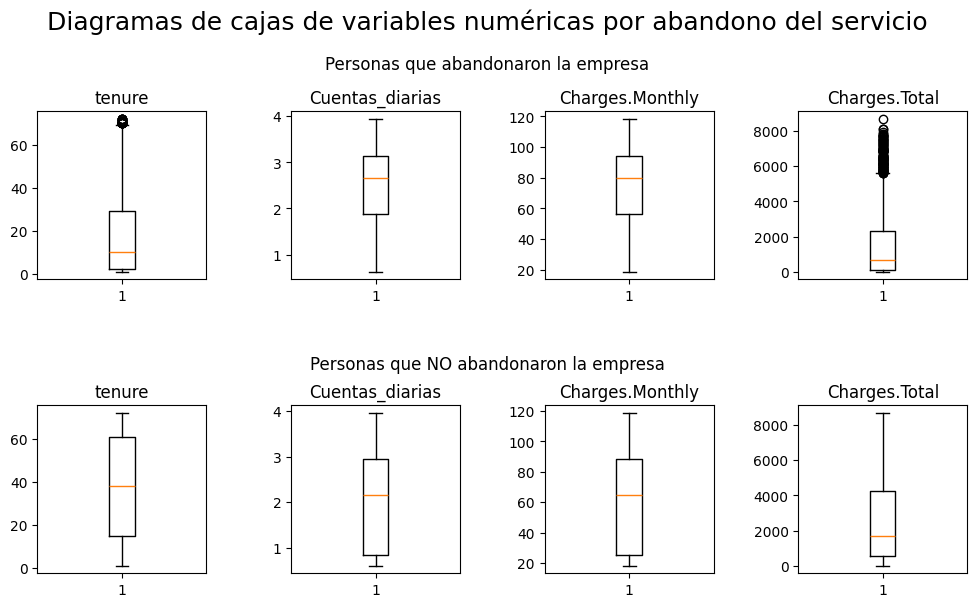

In [598]:
fig, axs = plt.subplots(2,4, figsize = (12,6))
fig.subplots_adjust(hspace= 0.75, wspace=0.5)
fig.suptitle('Diagramas de cajas de variables numéricas por abandono del servicio', fontsize=18, y= 1.05)
fig.text(0.5, 0.95, 'Personas que abandonaron la empresa', ha='center', fontsize=12)
fig.text(0.5, 0.45, 'Personas que NO abandonaron la empresa', ha='center', fontsize=12)

variables = ['tenure','Cuentas_diarias', 'Charges.Monthly','Charges.Total']

for i, var in enumerate(variables):
    axs[0, i].boxplot(df_churn_yes[var])
    axs[0, i].set_title(var)
    
    axs[1, i].boxplot(df_churn_no[var])
    axs[1, i].set_title(var)

plt.show()

Al analizar las estadísticas descriptivas de los clientes que se fueron en comparación con los que se han mantenido en el servicio, podemos identificar que los clientes que se fueron en promedio tienen una duracion del contrato menor en comparción con los que se han mantenido, lo cual es relativamente lógico. Al revisar el promeido de cobro mensual y diarios, podemos observar que los clientes que se han ido tienen en promedio mayores cobros mensuales y diarios, aunque el total de cobro si es mayor en los clientes que se han mantenido pero esto se puede explicar por la mayor duración del contrato. De igual forma es importante resaltar que el 75% de los clientes que se han ido tienen un cobre mensual y diario mayor a los que se han mantenido. Es importante revisar la correlacion entre las el cobro mensual y diario para saber si existe una relación entre el cobro y la decisión de abandonar la empresa, aunque por el momento no se puede concluir nada al respecto.

### Distribución de género

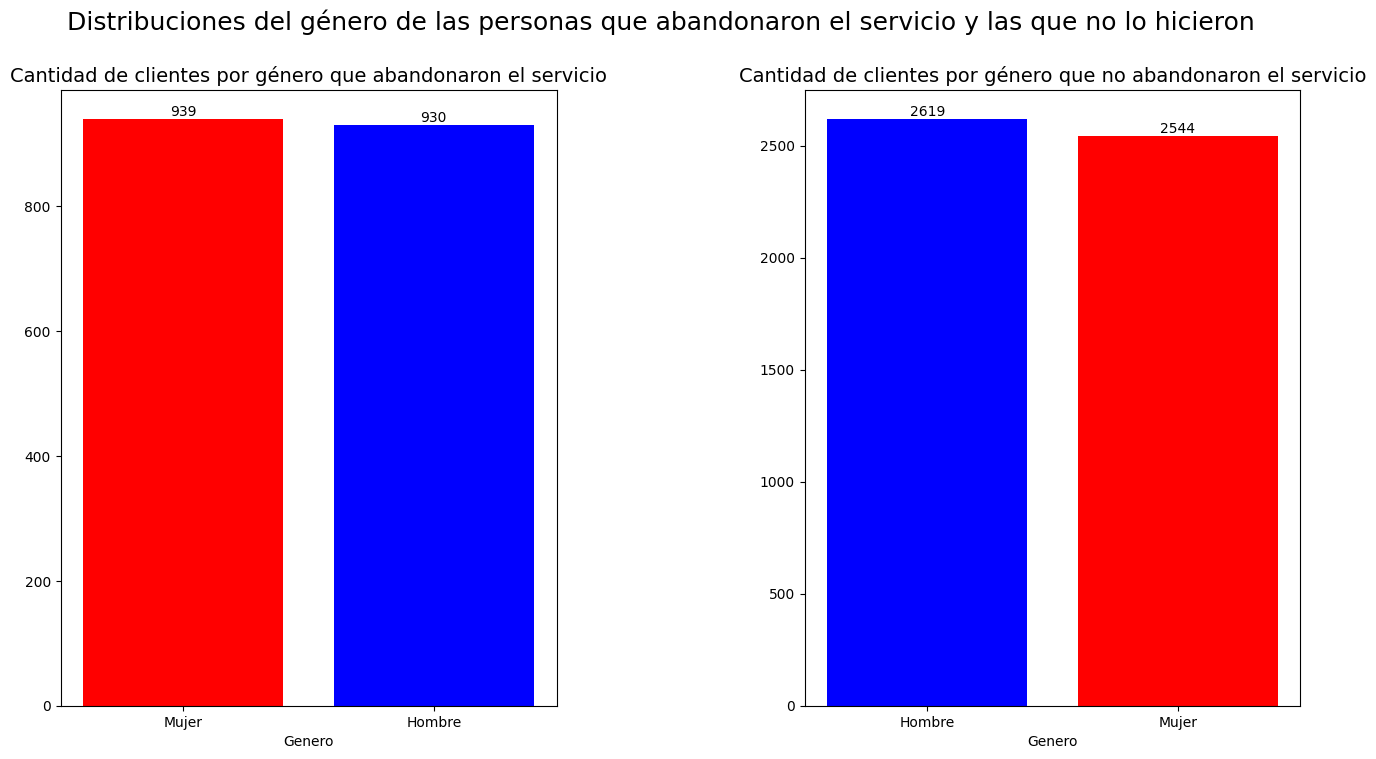

In [599]:
fig, axs = plt.subplots(1,2,figsize=(16, 8))
fig.suptitle('Distribuciones del género de las personas que abandonaron el servicio y las que no lo hicieron', fontsize = 18)
fig.subplots_adjust(wspace=0.5)
gender_colors = {"Mujer": "red", "Hombre": "blue"}


gender_counts_yes = df_churn_yes['gender'].value_counts()
gender_counts_no = df_churn_no['gender'].value_counts()

colors_gender_yes = [gender_colors[label] for label in gender_counts_yes.index]
colors_gender_no = [gender_colors[label] for label in gender_counts_no.index]

colors_gender = [gender_colors[label] for label in gender_counts_yes.index]
axs[0].bar(gender_counts_yes.index, gender_counts_yes.values, color = colors_gender_yes)
for i, j in enumerate(gender_counts_yes.values):
    axs[0].text(i, j, str(j), color='black', fontsize=10, ha='center', va='bottom')

axs[0].set_xlabel('Genero')
axs[0].set_title('Cantidad de clientes por género que abandonaron el servicio',fontsize = 14)

axs[1].bar(gender_counts_no.index, gender_counts_no.values, color = colors_gender_no)
for i, j in enumerate(gender_counts_no.values):
    axs[1].text(i, j, str(j), color='black', fontsize=10, ha='center', va='bottom')

axs[1].set_xlabel('Genero')
axs[1].set_title('Cantidad de clientes por género que no abandonaron el servicio', fontsize = 14)

plt.show()

Podemos observar que no hay mucha diferencia en terminos del género de los clientes que han abandonado el servicio, debido a que las distribuciones son bastante equilibradas entre hombres y mujeres. Por lo tanto, podemos concluir que el género no es un factor determinante en la decisión de abandonar el servicio. 

### Datos demograficos de los clientes que abandonaron el servicio contra los que no abandonaron el servicio (senior citizen, partner, dependents)

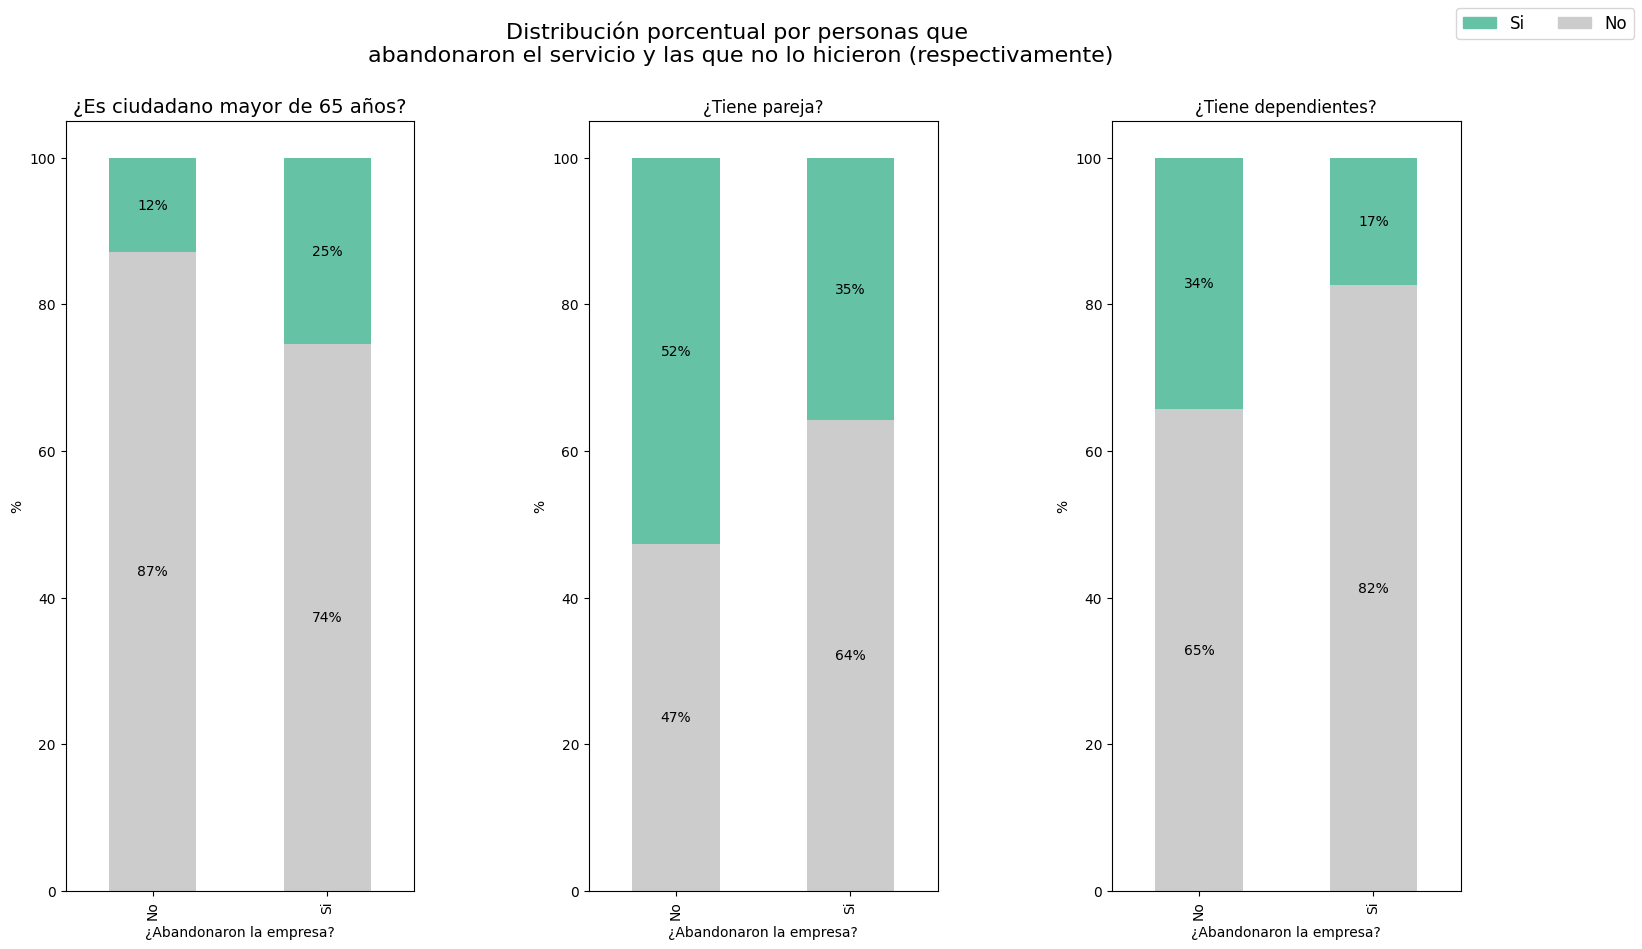

In [600]:
def get_stacked_percentage(var):
    counts = df.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages


def add_labels(ax, df):
    for i, row in enumerate(df.values):
        cumulative = 0
        for j, val in enumerate(row):
            if val > 0:
                label = f"{int(val)}%"  
                ax.text(i, cumulative + val / 2, label, ha='center', va='center', fontsize=10)
                cumulative += val

senior_pct = get_stacked_percentage('SeniorCitizen')
partner_pct = get_stacked_percentage('Partner')
dependents_pct = get_stacked_percentage('Dependents')
phone_service_pct = get_stacked_percentage('PhoneService')
internt_service_pct = get_stacked_percentage('InternetService')

color_dicts_yes_no = {
    'Categorical_Yes_No': {'Si': '#66C2A5', 'No': '#CCCCCC'},}

fig, axs = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Distribución porcentual por personas que \nabandonaron el servicio y las que no lo hicieron (respectivamente)', fontsize=16)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

fig.subplots_adjust(wspace=0.5, hspace= 1)


senior_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in senior_pct.columns], legend= False)
axs[0].set_title('¿Es ciudadano mayor de 65 años?', fontsize = 14)
axs[0].set_ylabel('%', fontsize = 10)
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], senior_pct)

partner_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in partner_pct.columns], legend= False)
axs[1].set_title('¿Tiene pareja?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1],partner_pct)


dependents_pct.plot(kind='bar', stacked=True, ax=axs[2], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in dependents_pct.columns], legend= False)
axs[2].set_title('¿Tiene dependientes?')
axs[2].set_ylabel('%')
axs[2].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[2],dependents_pct)

plt.show()


Al analizar los datos demográficos de los clientes que han abandonado el servicio en comparación con los que no lo han hecho, podemos identificar diferentes patrones que pueden ayudar a entender las razones detrás de la desuscripción. En primer lugar, hay un porcentaje mayor de clientes que mayores de 65 años que han abandonado la empresa en comparación con los que no lo han hecho. Esto sugiere que los clientes mayores pueden ser más propensos a abandonar el servicio, lo cual puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes. Aunque es importante tener en cuenta que la diferencia no es muy grande, ya que el 25% que han abandonado el servicio son mayores de 65 años, mientras que el 12% de los que no lo han hecho también lo son.

De igual forma las personas que **no** han abandonado el servicio tienen un porcentaje mayor de personas con pareja y dependientes en comparación con los que han abandonado el servicio. Esto sugiere que los clientes que posiblemente tengan una familia o pareja son menos propensos a abandonar el servicio, lo cual puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes.

### Analisis de servicios contratados por los clientes que se han ido en comparación con los que se han mantenido

In [601]:
df['PhoneService'].value_counts()

PhoneService
Si    6352
No     680
Name: count, dtype: int64

In [602]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Si                  2967
No phone service     680
Name: count, dtype: int64

In [603]:
df['InternetService'].value_counts()

InternetService
Fibra Óptica    3096
DSL             2416
No              1520
Name: count, dtype: int64

In [604]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3087
Si                     2425
No internet service    1520
Name: count, dtype: int64

In [605]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3094
Si                     2418
No internet service    1520
Name: count, dtype: int64

In [606]:
df['TechSupport'].value_counts()

TechSupport
No                     3472
Si                     2040
No internet service    1520
Name: count, dtype: int64

In [607]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2809
Si                     2703
No internet service    1520
Name: count, dtype: int64

In [608]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2781
Si                     2731
No internet service    1520
Name: count, dtype: int64

### Servicios telefonicos

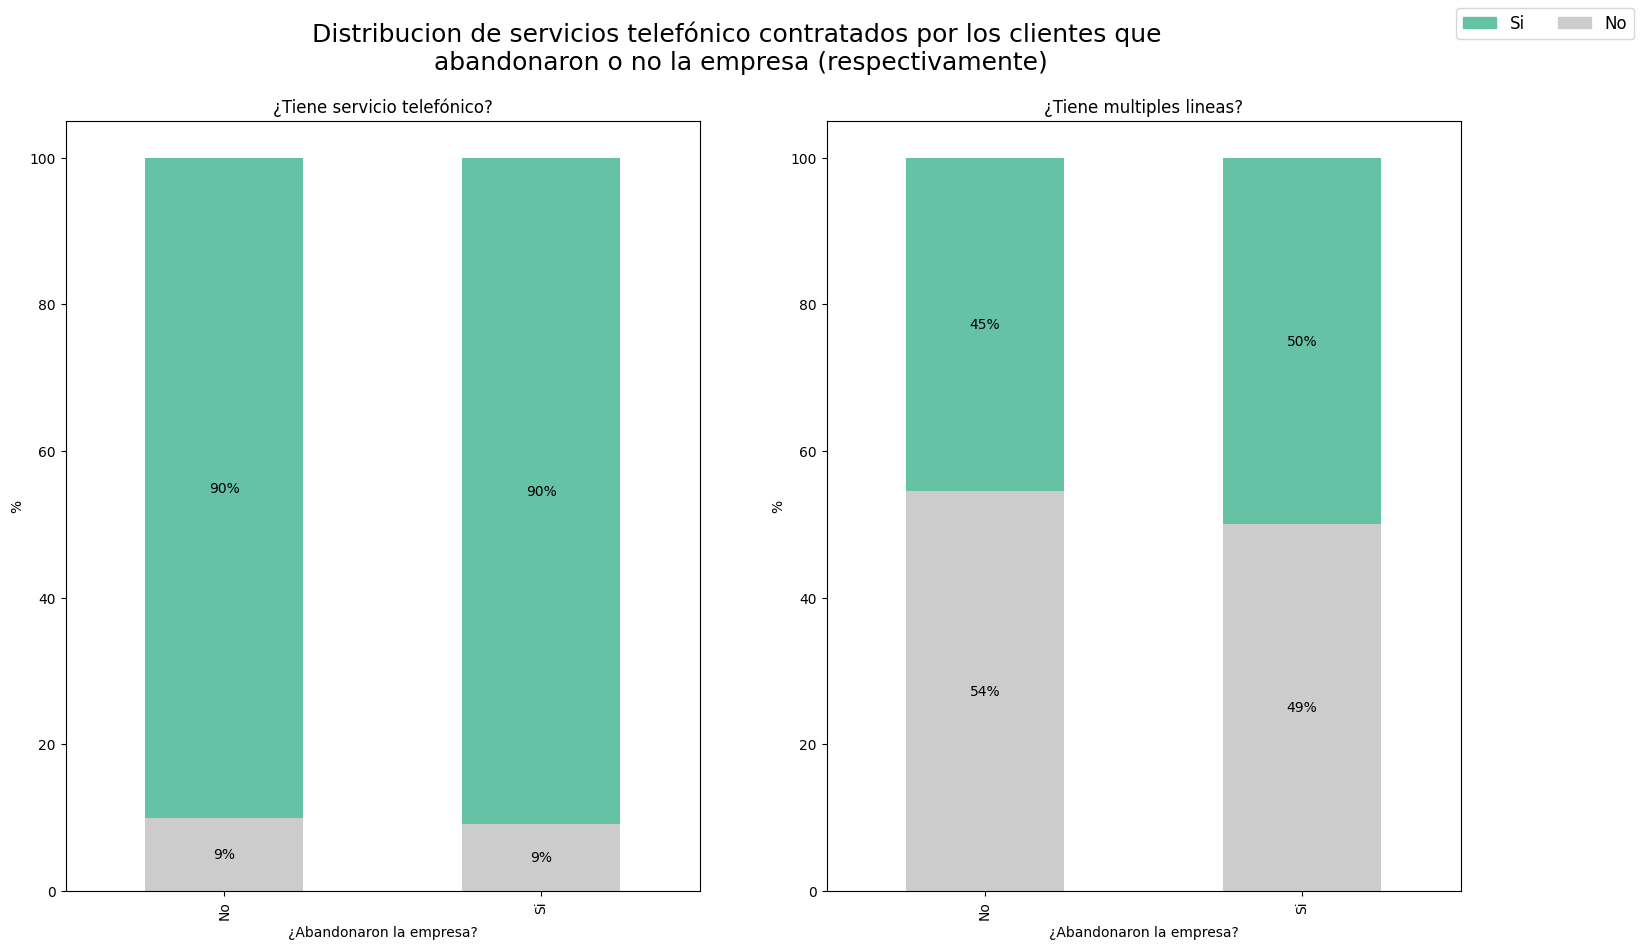

In [609]:
def get_stacked_percentage_multiplelines(var):
    df_multiple_lines = df[df['MultipleLines'] != 'No phone service'].copy()
    counts = df_multiple_lines.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages


phone_service_pct = get_stacked_percentage('PhoneService')
multiplelines_pct = get_stacked_percentage_multiplelines('MultipleLines')


fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribucion de servicios telefónico contratados por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

phone_service_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in phone_service_pct.columns], legend = False)
axs[0].set_title('¿Tiene servicio telefónico?')
axs[0].set_ylabel('%')
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], phone_service_pct)

multiplelines_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in multiplelines_pct.columns], legend = False)
axs[1].set_title('¿Tiene multiples lineas?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1], multiplelines_pct)

Al revisar los servicios telefónicos contratados por los clientes que se han ido en comparación con los que se han mantenido, podemos observar que las distribuciones de las personas que han contratdo el servicio telefónico son iguales para ambos grupos, lo cual sugiere que el servicio telefónico no es un factor determinante en la decisión de abandonar el servicio. Lo mismo pasa con las personas que han contratado más de una línea telefónica, ya que las distribuciones son bastante equilibradas entre los dos grupos. Lo que nos lleva a concluir que el servicio telefónico y la contratación de más de una línea telefónica no son factores determinantes en la decisión de abandonar el servicio.

### Servicios de internet

In [610]:
df['InternetService'].value_counts()

InternetService
Fibra Óptica    3096
DSL             2416
No              1520
Name: count, dtype: int64

In [611]:
internet_services = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_internet_services_comprobacion = df[df['OnlineBackup'] != 'No internet service'].copy()

In [612]:
df_internet_services_comprobacion['OnlineBackup'].value_counts()

OnlineBackup
No    3087
Si    2425
Name: count, dtype: int64

In [613]:
df_internet_services_comprobacion['OnlineSecurity'].value_counts()

OnlineSecurity
No    3497
Si    2015
Name: count, dtype: int64

In [614]:
df_internet_services_comprobacion['DeviceProtection'].value_counts()

DeviceProtection
No    3094
Si    2418
Name: count, dtype: int64

In [615]:
df_internet_services_comprobacion['TechSupport'].value_counts()

TechSupport
No    3472
Si    2040
Name: count, dtype: int64

In [616]:
df_internet_services_comprobacion['StreamingMovies'].value_counts()

StreamingMovies
No    2781
Si    2731
Name: count, dtype: int64

In [617]:
df_internet_services_comprobacion['StreamingTV'].value_counts()

StreamingTV
No    2809
Si    2703
Name: count, dtype: int64

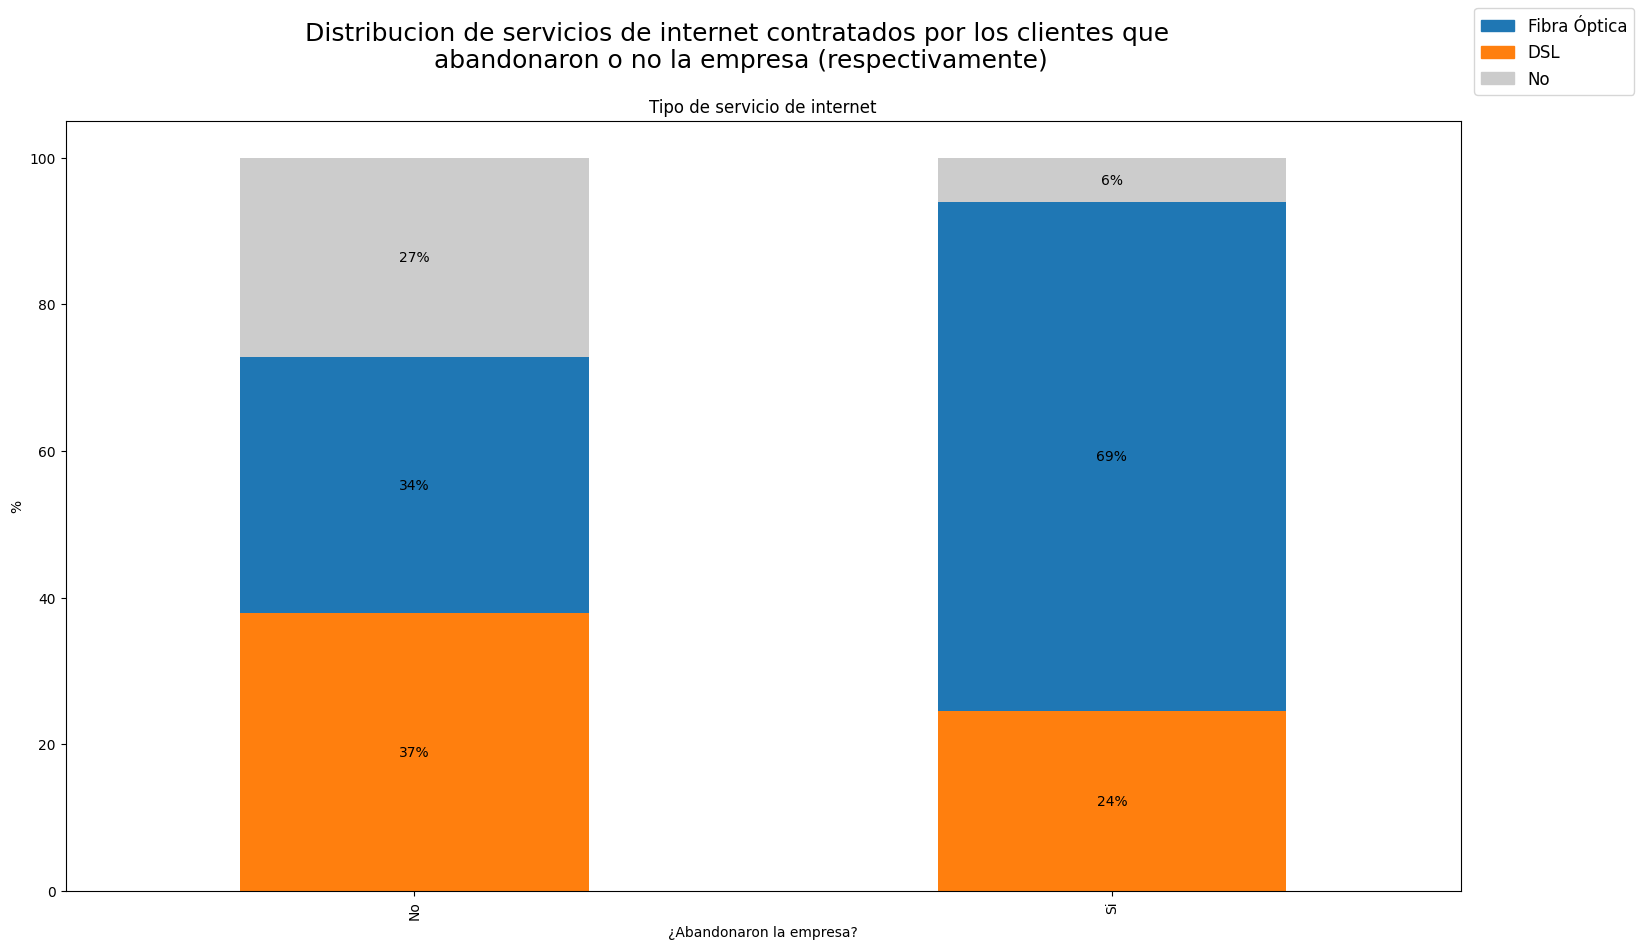

In [618]:
color_dicts_internet_service = {
    'Fibra Óptica': '#1f77b4',
    'DSL': '#ff7f0e',
    'No': '#CCCCCC'
}


internet_service_pct = get_stacked_percentage('InternetService')
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Distribucion de servicios de internet contratados por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color=color_dicts_internet_service['Fibra Óptica'], label='Fibra Óptica'),
    mpatches.Patch(color=color_dicts_internet_service['DSL'], label='DSL'),
    mpatches.Patch(color=color_dicts_internet_service['No'], label='No')
]
fig.legend(handles=legend_patches, loc='upper right', ncol=1, fontsize=12)

internet_service_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[color_dicts_internet_service.get(x, '#999999') for x in internet_service_pct.columns],
    legend=False
)
ax.set_title('Tipo de servicio de internet')
ax.set_ylabel('%')
ax.set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(ax, internet_service_pct)



El análisis de las distribuciones de los servcios de internet contratados por los clientes que se han ido en comparación con los que se han mantenido, revela que la mayoría de los clientes que se han ido han contratado el servicio de internet de fibra óptica. Esto sugiere que el servicio de internet de fibra óptica puede ser un factor determinante en la decisión de abandonar el servicio, ya que los clientes que han contratado este servicio son más propensos a abandonar la empresa. De igual forma, es importante resaltar que hay más clientes que no han contratado el servicio de internet que han abandonado la empresa, lo cual sugiere que el servicio de internet no es un factor determinante en la decisión de abandonar el servicio.


Otro dato interesante es que la distribución de los clientes que no se han abandonado la empresa tienen una distribución más equilibrada de los servicios de internet contratados, esto se puede explicar porque hay una mayor cantidad de clientes que no se han ido contra los que se han ido, lo que puede llevar a una distribución más equilibrada de los servicios contratados (al generar una distribución normal).

### Servicios de seguridad, protección y soporte para servicios de internet

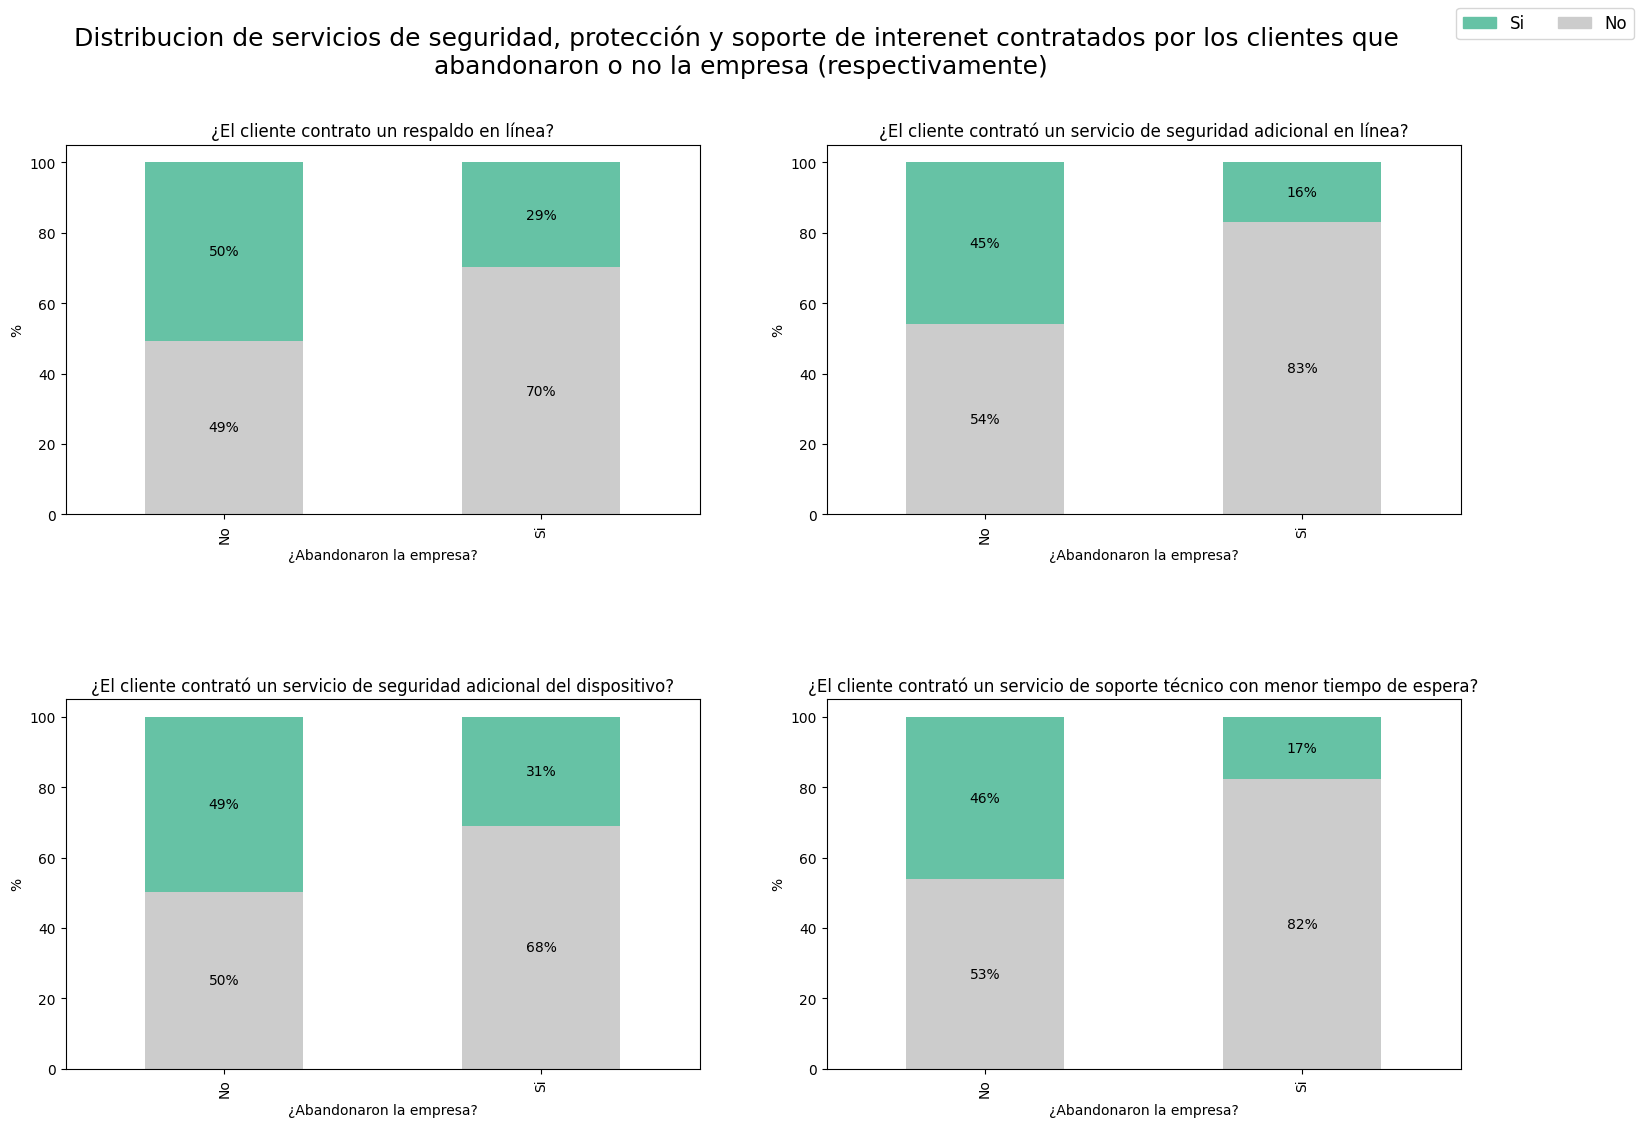

In [619]:
def get_stacked_percentage_internet_services(var):
    # Al quitar el No internet service de una columna se elimina en todas como podemos ver en los value counts de arriba 
    df_internet_services = df[df['OnlineBackup'] != 'No internet service'].copy()
    counts = df_internet_services.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages

online_backup_pct = get_stacked_percentage_internet_services('OnlineBackup')
online_security_pct = get_stacked_percentage_internet_services('OnlineSecurity')
device_protection_pct = get_stacked_percentage_internet_services('DeviceProtection')
tech_support_pct = get_stacked_percentage_internet_services('TechSupport')


fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribucion de servicios de seguridad, protección y soporte de interenet contratados por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

online_backup_pct.plot(kind='bar', stacked=True, ax=axs[0,0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in online_backup_pct.columns], legend = False)
axs[0,0].set_title('¿El cliente contrato un respaldo en línea?')
axs[0,0].set_ylabel('%')
axs[0,0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0,0], online_backup_pct)

online_security_pct.plot(kind='bar', stacked=True, ax=axs[0,1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in online_security_pct.columns], legend = False)
axs[0,1].set_title('¿El cliente contrató un servicio de seguridad adicional en línea?')
axs[0,1].set_ylabel('%')
axs[0,1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0,1], online_security_pct)

device_protection_pct.plot(kind='bar', stacked=True, ax=axs[1,0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in device_protection_pct.columns], legend = False)
axs[1,0].set_title('¿El cliente contrató un servicio de seguridad adicional del dispositivo?')
axs[1,0].set_ylabel('%')
axs[1,0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1,0], device_protection_pct)

tech_support_pct.plot(kind='bar', stacked=True, ax=axs[1,1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in tech_support_pct.columns], legend = False)
axs[1,1].set_title('¿El cliente contrató un servicio de soporte técnico con menor tiempo de espera?')
axs[1,1].set_ylabel('%')
axs[1,1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1,1], tech_support_pct)

Al revisar servicios de internet adicionales de protección, seguridad y soporte técnico, podemos identificar que los clientes que se han ido tienden a contratar menos de estos servicios en comparación con los que se han mantenido. Aproximadamente el 50% de clientes que se han mantenido en la empresa han contratado algún tipo de servicio adicional, como los mencionado anteriormente. Esto pude sugerir que los clientes que se han ido no están tan interesados en estos servicios adicionales, lo cual puede afectar a su desición de abandonar la empresa. Estos servicios tienen el enfoque de mejorar la experiencia del cliente y reducir el tiempo de espera para recibir soporte técnico, lo cual puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes. La falta de la contratación de estos servicios lleva a que estos clientes tengan la experiencia base de la empresa y puede que no esten satisfechos con la misma, lo cual puede llevar a que abandonen el servicio. 

Una posible estrategia sería generar una campaña de marketing enfocada en los beneficios de estos servicios adicionales, para incentivar a los clientes a contratarlos y mejorar su experiencia con la empresa. De igual forma, se podría ofrecer un periodo de prueba gratuito para estos servicios, para que los clientes puedan probarlos y comparar su experiencia. Además se podría ofrecer un descuento en la contratación de estos servicios adicionales, para incentivar a los clientes a contratarlos y mejorar su experiencia con la empresa.

### Servicios de internet adicionales de entretenimiento (Streaming TV y Streaming Movies)

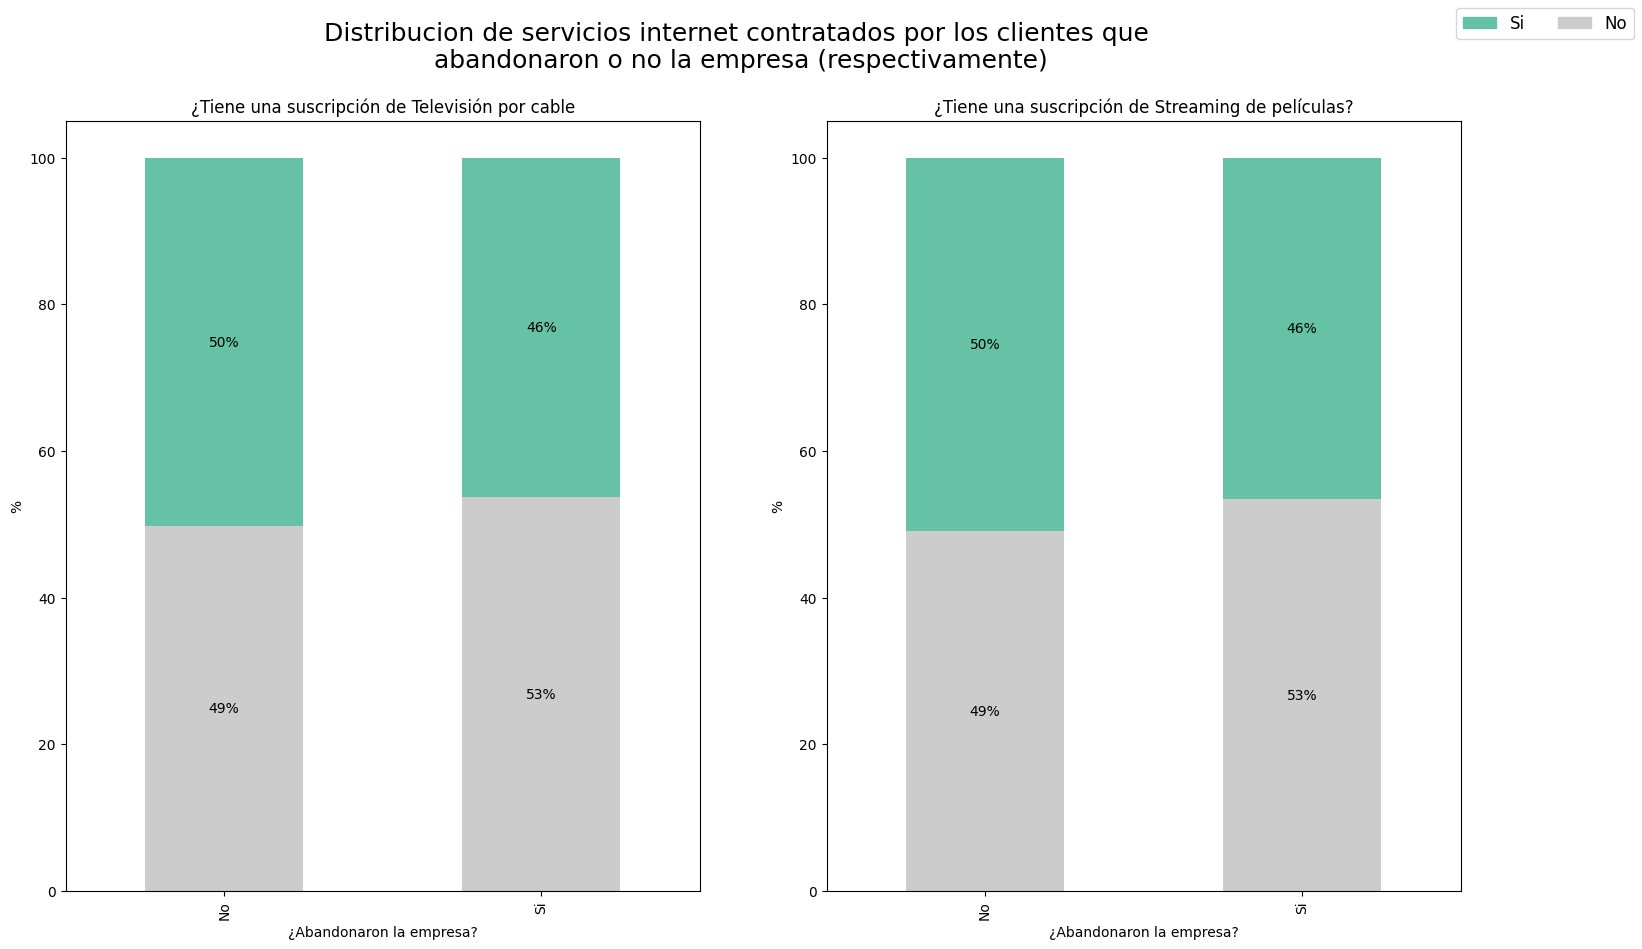

In [620]:
Streaming_TV_pct = get_stacked_percentage_internet_services('StreamingTV')
Streaming_Movies_pct = get_stacked_percentage_internet_services('StreamingMovies')


fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribucion de servicios internet contratados por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

Streaming_TV_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in Streaming_TV_pct.columns], legend = False)
axs[0].set_title('¿Tiene una suscripción de Televisión por cable')
axs[0].set_ylabel('%')
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], Streaming_TV_pct)

Streaming_Movies_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in Streaming_Movies_pct.columns], legend = False)
axs[1].set_title('¿Tiene una suscripción de Streaming de películas?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1], Streaming_Movies_pct)

Al analizar las distribuciones de los servicios de entretenimiento contratados por los clientes que se han ido en comparación con los que se han mantenido, podemos observar que las distribuciones entre ambos grupos son bastante equilibradas y similares. Lo cual suigiere que los servicios de entretenimiento no son un factor determinante en la decisión de abandonar el servicio.

In [621]:
df['Contract'].value_counts().index.tolist()

['Mes a mes', 'Dos años', 'Un año']

### Tipo de contrato

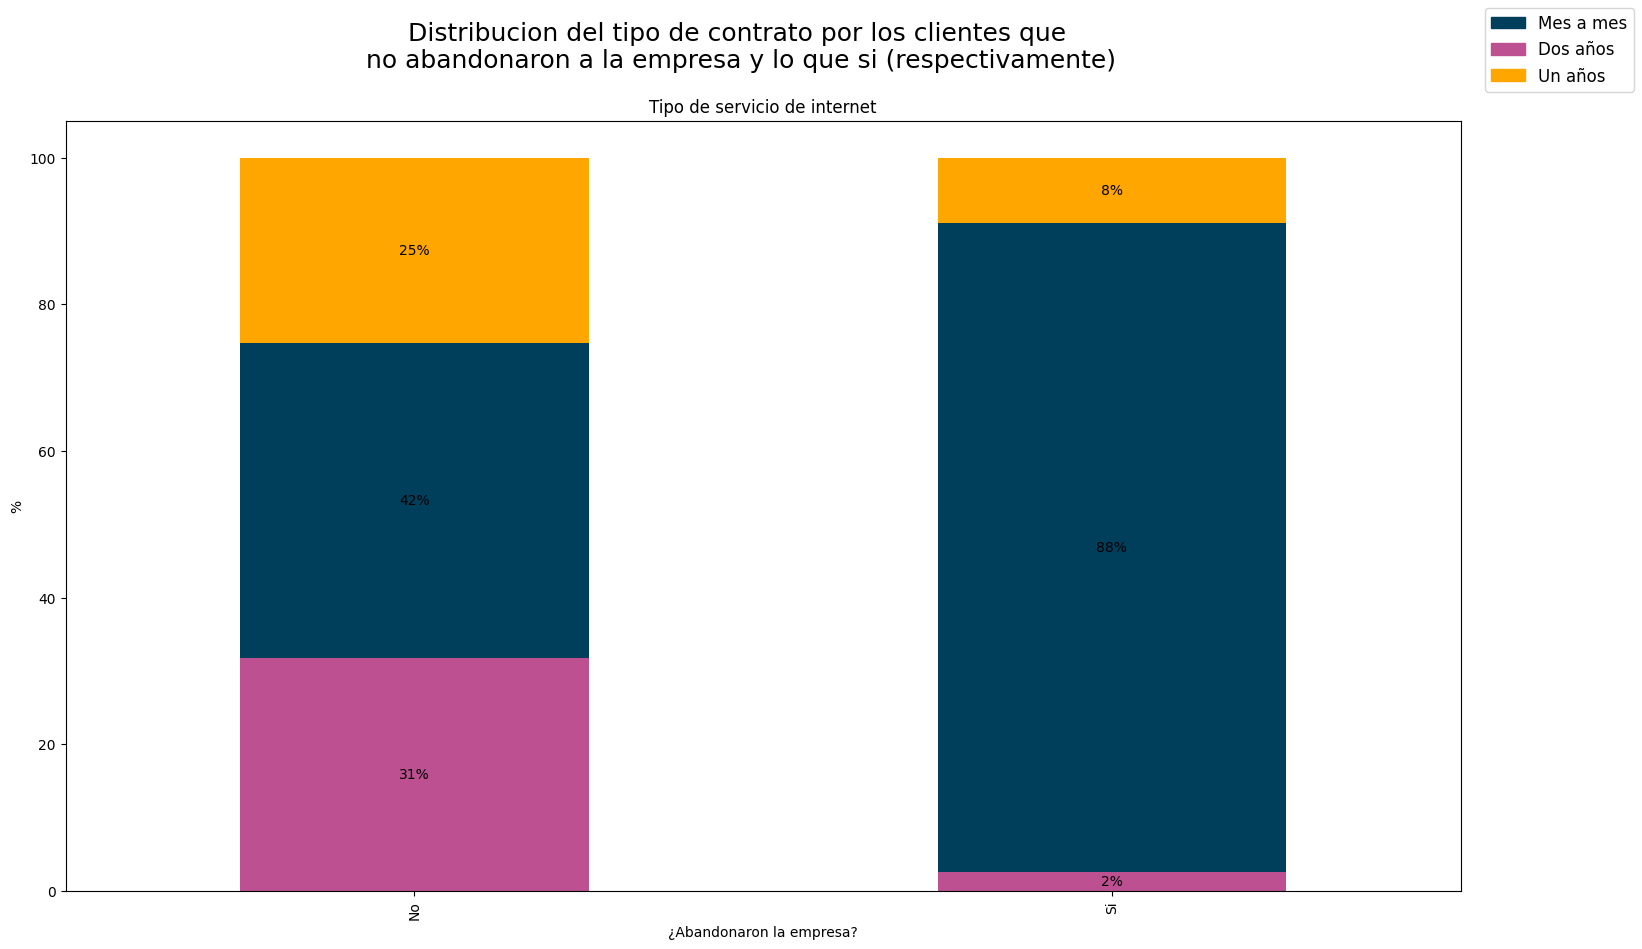

In [622]:
contrato_pct = get_stacked_percentage('Contract')


color_dicts_contract = {
    'Mes a mes': '#003f5c',
    'Dos años': '#bc5090',
    'Un año': '#ffa600'
}

fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Distribucion del tipo de contrato por los clientes que \nno abandonaron a la empresa y lo que si (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color=color_dicts_contract['Mes a mes'], label='Mes a mes'),
    mpatches.Patch(color=color_dicts_contract['Dos años'], label='Dos años'),
    mpatches.Patch(color=color_dicts_contract['Un año'], label='Un años')
]
fig.legend(handles=legend_patches, loc='upper right', ncol=1, fontsize=12)

contrato_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[color_dicts_contract.get(x, '#999999') for x in contrato_pct.columns],
    legend=False
)
ax.set_title('Tipo de servicio de internet')
ax.set_ylabel('%')
ax.set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(ax, contrato_pct)


Al analizar el tipo de contrato de los clientes, podemos observar que la gran mayoría de los clientes que se han ido tienen un contrato mensual. Lo que sugiere que los clientes que tienen un contrato mensual son más propensos a abandonar el servicio, lo que sugiere que el tipo de contrato puede ser un factor determinante en la decisión de abandonar el servicio. Por lo tanto, es importante considerar el tipo de contrato al momento de diseñar estrategias de retención de clientes.

In [623]:
df['PaymentMethod'].value_counts()

PaymentMethod
Cheque electrónico                     2365
Cheque por enviado por correo          1604
Transferencia bancaria (automática)    1542
Tarjeta de crédito (automática)        1521
Name: count, dtype: int64

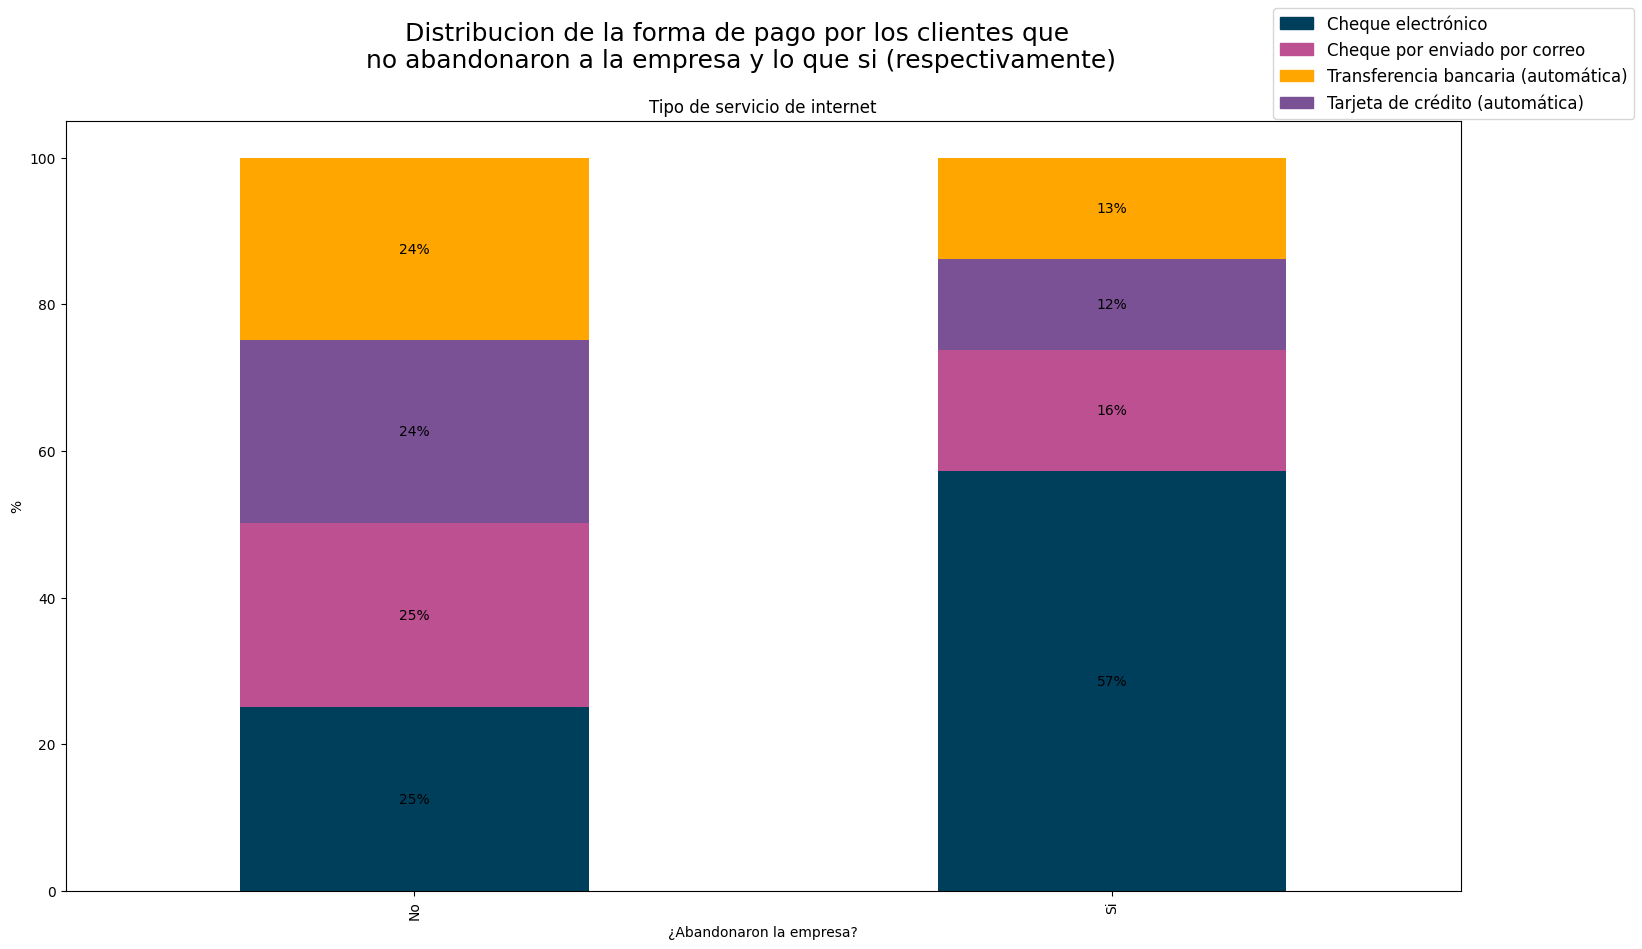

In [624]:
forma_de_pago_pct = get_stacked_percentage('PaymentMethod')


color_dicts_pago = {
    'Cheque electrónico': '#003f5c',           
    'Cheque por enviado por correo': '#bc5090',               
    'Transferencia bancaria (automática)': '#ffa600',  
    'Tarjeta de crédito (automática)': '#7a5195'     
}

fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Distribucion de la forma de pago por los clientes que \nno abandonaron a la empresa y lo que si (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color=color_dicts_pago['Cheque electrónico'], label='Cheque electrónico'),
    mpatches.Patch(color=color_dicts_pago['Cheque por enviado por correo'], label='Cheque por enviado por correo'),
    mpatches.Patch(color=color_dicts_pago['Transferencia bancaria (automática)'], label='Transferencia bancaria (automática)'),
    mpatches.Patch(color = color_dicts_pago['Tarjeta de crédito (automática)'], label = 'Tarjeta de crédito (automática)')
]

fig.legend(handles=legend_patches, loc='upper right', ncol=1, fontsize=12)

forma_de_pago_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[
color_dicts_pago.get(x, '#999999') for x in forma_de_pago_pct.columns],
    legend=False
)
ax.set_title('Tipo de servicio de internet')
ax.set_ylabel('%')
ax.set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(ax, forma_de_pago_pct)


Por último al revisar las formas de pago, podemos identificar que las distribuciones de los clientes que se han quedado en la empressa son bastante equilibradas entre las diferentes formas de pago, por otro lado la mayoría de los clientes que se han ido tienen una forma de pago por cheque electrónico. Desde un punto de vista personal no considero que esto sea un factor determinante en la decisión de abandonar el servicio, ya que las formas de pago son bastante variadas y no hay una forma de pago que sea más propensa a abandonar el servicio que otra. Sin embargo, es importante revisar si el cheuq electrónico tiene alguna relación con la decisión de abandonar el servicio, ya que puede ser un factor a considerar para la empresa al momento de diseñar estrategias de retención de clientes.

### Analisis de correlación entre variables y abandono del servicio
En esta sección se realizará un análisis de correlación entre las variables y el abandono del servicio, de igual forma se buscara aislar diferentes factores que se mencionaron anteriormente que hagan probable el abandono de la empresa. 

In [625]:
df_corr = df.copy()

df_corr['Churn_num'] = df_corr['Churn'].map({'Si': 1, 'No': 0})
df_corr['Senior_num'] = df_corr['SeniorCitizen'].map({'Si': 1, 'No': 0})
df_corr['Partner_num'] = df_corr['Partner'].map({'Si': 1, 'No': 0})
df_corr['Dependents_num'] = df_corr['Dependents'].map({'Si': 1, 'No': 0})


#Senior
correlacion_churn_senior = df_corr[['Churn_num', 'Senior_num']].corr().iloc[0, 1]

#Partner
correlacion_churn_partner = df_corr[['Churn_num', 'Partner_num']].corr().iloc[0, 1]

#Dependents
correlacion_churn_dependents = df_corr[['Churn_num', 'Dependents_num']].corr().iloc[0, 1]

#Cuentas diarias
correlacion_churn_cuentas = df_corr[['Churn_num', 'Cuentas_diarias']].corr().iloc[0, 1]

#Tenure
correlacion_churn_tenure = df_corr[['Churn_num', 'tenure']].corr().iloc[0, 1]

#Servicio de fibra optica
df_corr['Fibra_Optica'] = (df_corr['InternetService'] == 'Fibra Óptica').astype(int)
correlacion_fibra_optica = df_corr[['Churn_num', 'Fibra_Optica']].corr().loc['Churn_num', 'Fibra_Optica']

#Contrato Mes a mes
df_corr['Mes_a_mes'] = (df_corr['Contract'] == 'Mes a mes').astype(int)
correlacion_mes_a_mes = df_corr[['Churn_num', 'Mes_a_mes']].corr().loc['Churn_num', 'Mes_a_mes']


print(f'Correlación entre churn y clientes mayores de 65 años: {correlacion_churn_senior:.3f}')
print(f'Correlación entre churn y personas con pareja: {correlacion_churn_partner:.3f}')
print(f'Correlación entre churn y con dependientes: {correlacion_churn_dependents:.3f}')
print(f'Correlación entre churn y cargos diarios: {correlacion_churn_cuentas:.3f}')
print(f'Correlación entre churn y tenure (meses de contrato): {correlacion_churn_tenure:.3f}')
print(f'Correlación entre churn y fibra óptica: {correlacion_fibra_optica:.3f}')
print(f'Correlación entre churn y contrato mes a mes: {correlacion_mes_a_mes:.3f}')

Correlación entre churn y clientes mayores de 65 años: 0.151
Correlación entre churn y personas con pareja: -0.150
Correlación entre churn y con dependientes: -0.163
Correlación entre churn y cargos diarios: 0.193
Correlación entre churn y tenure (meses de contrato): -0.354
Correlación entre churn y fibra óptica: 0.307
Correlación entre churn y contrato mes a mes: 0.405


# Conclusiones e insights
Al analizar la tasa de abandono de la empresa podemos identificar que esta no es muy alta ya que la gran mayoría de los clientes se han mantenido en la empresa, aunque la empresa tiene un porcentaje considerable de clientes que han abandonado el servicio (cerca del 30%). Con el fin de entender mejor las caussas de la desuscripción, es importante analizar las características de los clientes que se han ido en comparación con los que se han quedado.

Nuestro análisis arrojó que los clientes que se han ido no tienen un perfil demográfico específico ya que la distribución de generos entre ambos grupos es bastante equilibrada, de igual forma al revisar las correalaciones encontramos que no hay un relación significativa entre los mayores de 65 años, tener pareja o dependientes y la decisión de abandonar el servicio.

Por otro lado hay correlaciones poco significativaas entre contratar fibra óptica y abandonar el servicio, al igual que tener un contrato mensual también mostro tener una relación poco significativa con el abandono del servicio. Es importante resaltar que de los factores analizados estos últimos eran los que mostraron una relación más significativa con el abandono del servicio, por lo tanto es un área importante a revisar por parte de la empresa. De igual forma sería importante revisar la calidad del servicio base de la empresa en temas de soporte y seguridad ya que la gran mayoría de los clientes que no se han ido han contratado algún servicio adicional de protección, seguridad o soporte técnico, lo cual puede mejorar la experiencia del cliente y reducir el tiempo de espera para recibir soporte técnico. Esto puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes.

# Recomendaciones 
Las principales recomendaciones para la empresa son: 
- Realizar un análisis de tipo clustering (k-means) para identificar grupos de clientes con características similares y así poder diseñar estrategias de retención de clientes más efectivas.
- Realizar un análisis de la calidad del servicio base de la empresa en temas de soporte y seguridad, para mejorar la experiencia del cliente y reducir el tiempo de espera para recibir soporte técnico.
- Ofrecer pruebas de los servicios adicionales de protección, seguridad y soporte técnico, para que los clientes puedan probarlos y comparar su experiencia.
- Revisar la preferencia de los clientes por el tipo de contrato y su satisfacción. 